In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

config = tf.ConfigProto(
    gpu_options=tf.GPUOptions(
    allow_growth=True
    ))

In [2]:
# Recovery action の入ったデータ
#'''
r_path = '../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/'
contents = os.listdir(r_path)
data = pd.DataFrame()
num = 0
for c in range(len(contents)):
    print(r_path+contents[c])
    n_data = pd.read_csv(r_path+contents[c],header=None)
    data = pd.concat([data,n_data])
#'''

../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/log201808071317.csv
../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/log201808071320.csv
../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/log201808061458.csv
../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/log201808061526.csv
../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/log201808061727.csv
../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/log201808061453.csv
../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/log201808061510.csv
../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/log201808061520.csv
../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/log201808071200.csv


In [3]:

target_path = '../data/LOG_G/fix_ball_robot/bk_stable/'
#target_path = '../data/LOG_G/gotya/'
contents = os.listdir(target_path)
num = 0
for c in range(len(contents)):
    print(target_path+contents[c])
    n_data = pd.read_csv(target_path+contents[c],header=None)
    data = pd.concat([data,n_data])

print(len(data))
d = data
#print(ball)
#print(joy)

../data/LOG_G/fix_ball_robot/bk_stable/log201808031448.csv
../data/LOG_G/fix_ball_robot/bk_stable/log201808031442.csv
../data/LOG_G/fix_ball_robot/bk_stable/log201808031431.csv
../data/LOG_G/fix_ball_robot/bk_stable/log201808031503.csv
../data/LOG_G/fix_ball_robot/bk_stable/log201808031429.csv
../data/LOG_G/fix_ball_robot/bk_stable/log201808031508.csv
../data/LOG_G/fix_ball_robot/bk_stable/log201808031618.csv
59018


In [4]:
d.columns = ['l_bx','l_by','l_pole0x','l_pole0y','l_pole1x','l_pole1y','g_bx','g_by','g_pole0x','g_pole0y','g_pole1x','g_pole1y','g_px','g_py','g_pth','ljx','ljy','rjx','rjy']
#d = d[d.bx!=-1]

In [5]:
'''
from sklearn.cross_validation import train_test_split
t1 = []
t2 = []
def f1(x,y):
    return y * np.sin(x) + np.square(x)
def f2(x,y):
    return x * np.cos(y) + np.square(y)
for a in range(1000):
    r = np.array([np.random.rand(), np.random.rand()])
    t1.append(r)
    t2.append(np.array([ f1(r[0],r[1]),f2(r[0],r[1]) ]))
IN_train, IN_test, TAR_train, TAR_test = train_test_split(t1,t2,test_size=0.2,random_state=0)

IN_train = np.array(IN_train)
IN_test = np.array(IN_test)
TAR_train = np.array(TAR_train)
TAR_test = np.array(TAR_test)
print(IN_train[0])
print(IN_test[0])
print(TAR_train[0])
print(TAR_test[0])
print(f1(1,1))
print(f2(1,1))
'''

'\nfrom sklearn.cross_validation import train_test_split\nt1 = []\nt2 = []\ndef f1(x,y):\n    return y * np.sin(x) + np.square(x)\ndef f2(x,y):\n    return x * np.cos(y) + np.square(y)\nfor a in range(1000):\n    r = np.array([np.random.rand(), np.random.rand()])\n    t1.append(r)\n    t2.append(np.array([ f1(r[0],r[1]),f2(r[0],r[1]) ]))\nIN_train, IN_test, TAR_train, TAR_test = train_test_split(t1,t2,test_size=0.2,random_state=0)\n\nIN_train = np.array(IN_train)\nIN_test = np.array(IN_test)\nTAR_train = np.array(TAR_train)\nTAR_test = np.array(TAR_test)\nprint(IN_train[0])\nprint(IN_test[0])\nprint(TAR_train[0])\nprint(TAR_test[0])\nprint(f1(1,1))\nprint(f2(1,1))\n'

In [6]:
from sklearn.cross_validation import train_test_split

IN_size = 6
TAR_size = 3

l_ball = np.array(d.iloc[:,0:2])   #  0, 1
l_pole0 = np.array(d.iloc[:,2:4])  #  2, 3
l_pole1 = np.array(d.iloc[:,4:6])  #  4, 5
g_ball = np.array(d.iloc[:,6:8])   #  6, 7
g_pole0 = np.array(d.iloc[:,8:10]) #  8, 9
g_pole1 = np.array(d.iloc[:,10:12])# 10,11
g_pos = np.array(d.iloc[:,12:15])  # 12,13,14
ljoy = np.array(d.iloc[:,15:17])   # 15,16
rjoy = np.array(d.iloc[:,17:19])   # 17,18

input_d = np.array(d.iloc[:,0:IN_size])
output_d = np.array(d.iloc[:,15:18])
print(input_d.shape)
print(output_d.shape)



IN_train, IN_test, TAR_train, TAR_test = train_test_split(input_d,output_d,test_size=0.1,random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
#IN_train = IN_train/100.0
#IN_test = IN_test/100.0
for t in range(10):
    print(IN_train[t])
'''
print(IN_train[0])
print(IN_test[0])
print(TAR_train[0])
print(TAR_test[0])
'''

(59018, 6)
(59018, 3)
[0.84014753 0.17468594 1.21769852 3.32771447 2.34439603 0.98452162]
[ 0.34259257  0.02941903  1.57175908  1.09243741  0.97990596 -1.43930307]
[ 0.33117676 -0.33743405  3.71230546 -0.94451631  1.69370065 -2.58318487]
[ 0.61591974 -0.1398737   3.56503143  1.27061488  2.74361606 -1.1962205 ]
[ 0.19923238  0.0218821   4.1296325  -0.11664437  2.53298864 -2.16865031]
[1.27779411 0.60440076 0.93755894 4.43087343 3.10383486 2.99308046]
[0.81185694 0.29834927 0.92277427 3.42753301 2.14874231 1.13471763]
[ 0.30064744 -0.10221874  2.61285478  1.4280237   1.89644115 -1.07132652]
[ 0.40105007 -0.10468939  1.76091635  1.35381258  0.69627757 -1.0182212 ]
[1.53980724 0.12048405 2.49826111 4.08668218 4.18298414 2.10635183]


/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'\nprint(IN_train[0])\nprint(IN_test[0])\nprint(TAR_train[0])\nprint(TAR_test[0])\n'

In [7]:
#　初期化
sess = tf.Session(config=config)
test_sess = tf.Session(config=config)

INPUT = tf.placeholder(shape=[None, IN_size], dtype=tf.float32)
TARGET = tf.placeholder(shape=[None, TAR_size], dtype=tf.float32)

In [8]:
#hidden_size = [100]
hidden_size = [10,8,5]
batch_size = 100
iter_size = 200000

#　隠れ層の作成 （last layerに直結）
weights = []
biases = []
layers = []
tmp_size = IN_size
last_layer = INPUT
for hsize in hidden_size:
    weights.append(tf.Variable(tf.random_normal(shape=[tmp_size, hsize] )))
    biases.append(tf.Variable(tf.random_normal(shape=[hsize])))
    layers.append(tf.nn.relu(tf.add(tf.matmul(last_layer, weights[-1]), biases[-1]))) # 活性化関数
    tmp_size = hsize
    last_layer = layers[-1]
    print(layers[-1])
#　出力層
weights.append(tf.Variable(tf.random_normal(shape=[tmp_size, TAR_size])))
biases.append(tf.Variable(tf.random_normal(shape=[TAR_size])))
layers.append(tf.add(tf.matmul(last_layer, weights[-1]), biases[-1]))
final_output = layers[-1]
print(final_output)

Tensor("Relu:0", shape=(?, 10), dtype=float32)
Tensor("Relu_1:0", shape=(?, 8), dtype=float32)
Tensor("Relu_2:0", shape=(?, 5), dtype=float32)
Tensor("Add_3:0", shape=(?, 3), dtype=float32)


In [9]:
#　学習
loss = tf.losses.mean_squared_error(TARGET,final_output)
test_loss = tf.losses.mean_squared_error(TARGET,final_output)
opt = tf.train.AdamOptimizer(0.001)
#opt = tf.train.GradientDescentOptimizer(0.01)
train_step = opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)
test_sess.run(init)
loss_vec=[]
test_loss_vec=[]
for i in range(iter_size):
    train_rand_index = np.random.choice(len(IN_train), size=batch_size,replace=False)
    train_rand_in = IN_train[train_rand_index]
    train_rand_tar = TAR_train[train_rand_index]
    sess.run(train_step, feed_dict={INPUT:train_rand_in, TARGET: train_rand_tar})
    loss_vec.append(sess.run(loss, feed_dict={INPUT:train_rand_in, TARGET: train_rand_tar}))
    
    test_rand_index = np.random.choice(len(IN_test), size=batch_size,replace=False)
    test_rand_in = IN_test[test_rand_index]
    test_rand_tar = TAR_test[test_rand_index]
    test_sess.run(train_step, feed_dict={INPUT:test_rand_in, TARGET: test_rand_tar})
    test_loss_vec.append(test_sess.run(test_loss, feed_dict={INPUT:test_rand_in, TARGET: test_rand_tar}))
    
    if (i+1)%25==0:
#        print(sess.run(INPUT, feed_dict={INPUT:rand_in, TARGET: rand_tar}))
        print('Generation:'+str(i+1)+', Loss = '+str(loss_vec[-1]))

Generation:25, Loss = 2.4623675
Generation:50, Loss = 1.6617484
Generation:75, Loss = 0.9111492
Generation:100, Loss = 0.609722
Generation:125, Loss = 0.51101035
Generation:150, Loss = 0.3950259
Generation:175, Loss = 0.35395873
Generation:200, Loss = 0.23793182
Generation:225, Loss = 0.25451738
Generation:250, Loss = 0.198457
Generation:275, Loss = 0.17170663
Generation:300, Loss = 0.20294346
Generation:325, Loss = 0.19162755
Generation:350, Loss = 0.19965035
Generation:375, Loss = 0.14888066
Generation:400, Loss = 0.17100807
Generation:425, Loss = 0.11241548
Generation:450, Loss = 0.1576274
Generation:475, Loss = 0.14389293
Generation:500, Loss = 0.16412039
Generation:525, Loss = 0.11117593
Generation:550, Loss = 0.12534153
Generation:575, Loss = 0.1078715
Generation:600, Loss = 0.13895495
Generation:625, Loss = 0.110750034
Generation:650, Loss = 0.115643986
Generation:675, Loss = 0.09736983
Generation:700, Loss = 0.09917337
Generation:725, Loss = 0.100944124
Generation:750, Loss = 0

Generation:5925, Loss = 0.063671134
Generation:5950, Loss = 0.08051666
Generation:5975, Loss = 0.063683234
Generation:6000, Loss = 0.071148455
Generation:6025, Loss = 0.08317658
Generation:6050, Loss = 0.071374625
Generation:6075, Loss = 0.09114163
Generation:6100, Loss = 0.07863239
Generation:6125, Loss = 0.060510643
Generation:6150, Loss = 0.067039765
Generation:6175, Loss = 0.089517236
Generation:6200, Loss = 0.0702908
Generation:6225, Loss = 0.07250609
Generation:6250, Loss = 0.06669814
Generation:6275, Loss = 0.071374625
Generation:6300, Loss = 0.06492682
Generation:6325, Loss = 0.07912716
Generation:6350, Loss = 0.08639287
Generation:6375, Loss = 0.071243785
Generation:6400, Loss = 0.07973759
Generation:6425, Loss = 0.06971009
Generation:6450, Loss = 0.069079794
Generation:6475, Loss = 0.05972533
Generation:6500, Loss = 0.07374508
Generation:6525, Loss = 0.061319795
Generation:6550, Loss = 0.05305212
Generation:6575, Loss = 0.07725635
Generation:6600, Loss = 0.06979746
Generation

Generation:11725, Loss = 0.06570316
Generation:11750, Loss = 0.067293786
Generation:11775, Loss = 0.061242905
Generation:11800, Loss = 0.067978315
Generation:11825, Loss = 0.07951281
Generation:11850, Loss = 0.066990055
Generation:11875, Loss = 0.053300522
Generation:11900, Loss = 0.057552174
Generation:11925, Loss = 0.065071054
Generation:11950, Loss = 0.061166916
Generation:11975, Loss = 0.04931232
Generation:12000, Loss = 0.07364832
Generation:12025, Loss = 0.056654904
Generation:12050, Loss = 0.05380178
Generation:12075, Loss = 0.06780852
Generation:12100, Loss = 0.060016472
Generation:12125, Loss = 0.06907013
Generation:12150, Loss = 0.069883615
Generation:12175, Loss = 0.054360505
Generation:12200, Loss = 0.046101887
Generation:12225, Loss = 0.05652165
Generation:12250, Loss = 0.05730753
Generation:12275, Loss = 0.06160928
Generation:12300, Loss = 0.053994343
Generation:12325, Loss = 0.059408914
Generation:12350, Loss = 0.073210046
Generation:12375, Loss = 0.058046658
Generation:

Generation:17375, Loss = 0.054938044
Generation:17400, Loss = 0.06497426
Generation:17425, Loss = 0.051922202
Generation:17450, Loss = 0.050743572
Generation:17475, Loss = 0.062325224
Generation:17500, Loss = 0.049361
Generation:17525, Loss = 0.048177436
Generation:17550, Loss = 0.060239125
Generation:17575, Loss = 0.0585489
Generation:17600, Loss = 0.06987186
Generation:17625, Loss = 0.06798318
Generation:17650, Loss = 0.059637133
Generation:17675, Loss = 0.059356328
Generation:17700, Loss = 0.042322975
Generation:17725, Loss = 0.056849767
Generation:17750, Loss = 0.055404276
Generation:17775, Loss = 0.064083606
Generation:17800, Loss = 0.053613015
Generation:17825, Loss = 0.06215137
Generation:17850, Loss = 0.05753034
Generation:17875, Loss = 0.052985553
Generation:17900, Loss = 0.05099988
Generation:17925, Loss = 0.05383021
Generation:17950, Loss = 0.061643198
Generation:17975, Loss = 0.052286122
Generation:18000, Loss = 0.054191254
Generation:18025, Loss = 0.054370087
Generation:18

Generation:22975, Loss = 0.046959803
Generation:23000, Loss = 0.06946375
Generation:23025, Loss = 0.056136556
Generation:23050, Loss = 0.056042824
Generation:23075, Loss = 0.060077675
Generation:23100, Loss = 0.06034154
Generation:23125, Loss = 0.047299445
Generation:23150, Loss = 0.05708386
Generation:23175, Loss = 0.05678901
Generation:23200, Loss = 0.044806823
Generation:23225, Loss = 0.053177536
Generation:23250, Loss = 0.04803145
Generation:23275, Loss = 0.058302302
Generation:23300, Loss = 0.045845557
Generation:23325, Loss = 0.059211083
Generation:23350, Loss = 0.05588221
Generation:23375, Loss = 0.05437996
Generation:23400, Loss = 0.04779257
Generation:23425, Loss = 0.056756433
Generation:23450, Loss = 0.057015408
Generation:23475, Loss = 0.05200472
Generation:23500, Loss = 0.046915498
Generation:23525, Loss = 0.056478944
Generation:23550, Loss = 0.062423147
Generation:23575, Loss = 0.058075245
Generation:23600, Loss = 0.03729614
Generation:23625, Loss = 0.04810998
Generation:2

Generation:28625, Loss = 0.05528265
Generation:28650, Loss = 0.05138744
Generation:28675, Loss = 0.049253643
Generation:28700, Loss = 0.051780112
Generation:28725, Loss = 0.05636316
Generation:28750, Loss = 0.0558875
Generation:28775, Loss = 0.060824253
Generation:28800, Loss = 0.05285618
Generation:28825, Loss = 0.046276063
Generation:28850, Loss = 0.05151172
Generation:28875, Loss = 0.052474815
Generation:28900, Loss = 0.05940574
Generation:28925, Loss = 0.05449763
Generation:28950, Loss = 0.054042943
Generation:28975, Loss = 0.05093402
Generation:29000, Loss = 0.06558124
Generation:29025, Loss = 0.055086937
Generation:29050, Loss = 0.05785163
Generation:29075, Loss = 0.066637136
Generation:29100, Loss = 0.058381468
Generation:29125, Loss = 0.057504877
Generation:29150, Loss = 0.06290191
Generation:29175, Loss = 0.047904305
Generation:29200, Loss = 0.05745828
Generation:29225, Loss = 0.05736395
Generation:29250, Loss = 0.047469854
Generation:29275, Loss = 0.051604092
Generation:29300

Generation:34250, Loss = 0.05653368
Generation:34275, Loss = 0.06045356
Generation:34300, Loss = 0.047335356
Generation:34325, Loss = 0.046017244
Generation:34350, Loss = 0.05294619
Generation:34375, Loss = 0.05099404
Generation:34400, Loss = 0.05797073
Generation:34425, Loss = 0.050895832
Generation:34450, Loss = 0.056789137
Generation:34475, Loss = 0.05396501
Generation:34500, Loss = 0.04866874
Generation:34525, Loss = 0.04328908
Generation:34550, Loss = 0.06381669
Generation:34575, Loss = 0.04505401
Generation:34600, Loss = 0.051755328
Generation:34625, Loss = 0.049582373
Generation:34650, Loss = 0.048714887
Generation:34675, Loss = 0.05561681
Generation:34700, Loss = 0.0641713
Generation:34725, Loss = 0.048397522
Generation:34750, Loss = 0.051058922
Generation:34775, Loss = 0.048046783
Generation:34800, Loss = 0.06048018
Generation:34825, Loss = 0.0638079
Generation:34850, Loss = 0.0633125
Generation:34875, Loss = 0.05111562
Generation:34900, Loss = 0.05204713
Generation:34925, Los

Generation:39900, Loss = 0.05248582
Generation:39925, Loss = 0.053685006
Generation:39950, Loss = 0.041795038
Generation:39975, Loss = 0.045548778
Generation:40000, Loss = 0.05482212
Generation:40025, Loss = 0.045767687
Generation:40050, Loss = 0.05421084
Generation:40075, Loss = 0.05066735
Generation:40100, Loss = 0.049511146
Generation:40125, Loss = 0.050069023
Generation:40150, Loss = 0.06134121
Generation:40175, Loss = 0.048672806
Generation:40200, Loss = 0.06035052
Generation:40225, Loss = 0.049828842
Generation:40250, Loss = 0.05490042
Generation:40275, Loss = 0.0442495
Generation:40300, Loss = 0.056570496
Generation:40325, Loss = 0.048504658
Generation:40350, Loss = 0.040975288
Generation:40375, Loss = 0.046956364
Generation:40400, Loss = 0.04449493
Generation:40425, Loss = 0.042507704
Generation:40450, Loss = 0.04595492
Generation:40475, Loss = 0.043852944
Generation:40500, Loss = 0.048511453
Generation:40525, Loss = 0.051006403
Generation:40550, Loss = 0.046273567
Generation:4

Generation:45500, Loss = 0.057127926
Generation:45525, Loss = 0.046317454
Generation:45550, Loss = 0.05303064
Generation:45575, Loss = 0.039674282
Generation:45600, Loss = 0.05166134
Generation:45625, Loss = 0.061004736
Generation:45650, Loss = 0.040267494
Generation:45675, Loss = 0.05484061
Generation:45700, Loss = 0.056627415
Generation:45725, Loss = 0.059127647
Generation:45750, Loss = 0.054407712
Generation:45775, Loss = 0.047472965
Generation:45800, Loss = 0.059632868
Generation:45825, Loss = 0.05433925
Generation:45850, Loss = 0.041656047
Generation:45875, Loss = 0.063020974
Generation:45900, Loss = 0.05739659
Generation:45925, Loss = 0.06455292
Generation:45950, Loss = 0.05417553
Generation:45975, Loss = 0.044189494
Generation:46000, Loss = 0.05825145
Generation:46025, Loss = 0.05596461
Generation:46050, Loss = 0.049790733
Generation:46075, Loss = 0.056720726
Generation:46100, Loss = 0.04963735
Generation:46125, Loss = 0.055737387
Generation:46150, Loss = 0.046587016
Generation:

Generation:51100, Loss = 0.045601856
Generation:51125, Loss = 0.05068475
Generation:51150, Loss = 0.044324014
Generation:51175, Loss = 0.052784514
Generation:51200, Loss = 0.0543596
Generation:51225, Loss = 0.04893006
Generation:51250, Loss = 0.0472772
Generation:51275, Loss = 0.042961508
Generation:51300, Loss = 0.04999202
Generation:51325, Loss = 0.049386278
Generation:51350, Loss = 0.0529862
Generation:51375, Loss = 0.042059347
Generation:51400, Loss = 0.047036115
Generation:51425, Loss = 0.048823733
Generation:51450, Loss = 0.045412406
Generation:51475, Loss = 0.0494387
Generation:51500, Loss = 0.05475205
Generation:51525, Loss = 0.053998914
Generation:51550, Loss = 0.05456007
Generation:51575, Loss = 0.05905638
Generation:51600, Loss = 0.044290964
Generation:51625, Loss = 0.054972097
Generation:51650, Loss = 0.05032909
Generation:51675, Loss = 0.055644576
Generation:51700, Loss = 0.037737157
Generation:51725, Loss = 0.05020215
Generation:51750, Loss = 0.053095024
Generation:51775,

Generation:56700, Loss = 0.044423636
Generation:56725, Loss = 0.053356826
Generation:56750, Loss = 0.051146355
Generation:56775, Loss = 0.0423283
Generation:56800, Loss = 0.044044636
Generation:56825, Loss = 0.043358453
Generation:56850, Loss = 0.040595334
Generation:56875, Loss = 0.05190743
Generation:56900, Loss = 0.05840821
Generation:56925, Loss = 0.048830837
Generation:56950, Loss = 0.042313814
Generation:56975, Loss = 0.05192797
Generation:57000, Loss = 0.048283067
Generation:57025, Loss = 0.058717053
Generation:57050, Loss = 0.05271373
Generation:57075, Loss = 0.05543723
Generation:57100, Loss = 0.049590863
Generation:57125, Loss = 0.047997072
Generation:57150, Loss = 0.048438992
Generation:57175, Loss = 0.04819068
Generation:57200, Loss = 0.047439218
Generation:57225, Loss = 0.052871134
Generation:57250, Loss = 0.05602672
Generation:57275, Loss = 0.04663574
Generation:57300, Loss = 0.046727173
Generation:57325, Loss = 0.0458041
Generation:57350, Loss = 0.039929427
Generation:57

Generation:62300, Loss = 0.04303107
Generation:62325, Loss = 0.0442388
Generation:62350, Loss = 0.043180376
Generation:62375, Loss = 0.048840635
Generation:62400, Loss = 0.050108086
Generation:62425, Loss = 0.041006614
Generation:62450, Loss = 0.059052303
Generation:62475, Loss = 0.041767176
Generation:62500, Loss = 0.057121493
Generation:62525, Loss = 0.0445365
Generation:62550, Loss = 0.04843738
Generation:62575, Loss = 0.0523362
Generation:62600, Loss = 0.05015079
Generation:62625, Loss = 0.041714255
Generation:62650, Loss = 0.053225316
Generation:62675, Loss = 0.046705905
Generation:62700, Loss = 0.044570707
Generation:62725, Loss = 0.043515194
Generation:62750, Loss = 0.049710788
Generation:62775, Loss = 0.05114379
Generation:62800, Loss = 0.050535336
Generation:62825, Loss = 0.057952926
Generation:62850, Loss = 0.052674826
Generation:62875, Loss = 0.045285642
Generation:62900, Loss = 0.051366452
Generation:62925, Loss = 0.054186903
Generation:62950, Loss = 0.042252608
Generation:

Generation:67900, Loss = 0.055145822
Generation:67925, Loss = 0.053943146
Generation:67950, Loss = 0.047744483
Generation:67975, Loss = 0.056932062
Generation:68000, Loss = 0.04798538
Generation:68025, Loss = 0.045690373
Generation:68050, Loss = 0.035704747
Generation:68075, Loss = 0.038731113
Generation:68100, Loss = 0.035792504
Generation:68125, Loss = 0.048347384
Generation:68150, Loss = 0.053048987
Generation:68175, Loss = 0.045864552
Generation:68200, Loss = 0.049892887
Generation:68225, Loss = 0.046893787
Generation:68250, Loss = 0.06506949
Generation:68275, Loss = 0.052731093
Generation:68300, Loss = 0.05362919
Generation:68325, Loss = 0.045245018
Generation:68350, Loss = 0.043698985
Generation:68375, Loss = 0.040437255
Generation:68400, Loss = 0.04635944
Generation:68425, Loss = 0.044413574
Generation:68450, Loss = 0.058016337
Generation:68475, Loss = 0.044830233
Generation:68500, Loss = 0.049106304
Generation:68525, Loss = 0.048285723
Generation:68550, Loss = 0.05052583
Genera

Generation:73500, Loss = 0.037449904
Generation:73525, Loss = 0.03977184
Generation:73550, Loss = 0.040696956
Generation:73575, Loss = 0.039808437
Generation:73600, Loss = 0.053210832
Generation:73625, Loss = 0.057566904
Generation:73650, Loss = 0.052219212
Generation:73675, Loss = 0.045915954
Generation:73700, Loss = 0.043918446
Generation:73725, Loss = 0.04997174
Generation:73750, Loss = 0.034613296
Generation:73775, Loss = 0.038268816
Generation:73800, Loss = 0.045242865
Generation:73825, Loss = 0.04214743
Generation:73850, Loss = 0.043583617
Generation:73875, Loss = 0.044525653
Generation:73900, Loss = 0.038433652
Generation:73925, Loss = 0.046302557
Generation:73950, Loss = 0.050450757
Generation:73975, Loss = 0.040214144
Generation:74000, Loss = 0.04085197
Generation:74025, Loss = 0.050212048
Generation:74050, Loss = 0.043713413
Generation:74075, Loss = 0.04912024
Generation:74100, Loss = 0.044274125
Generation:74125, Loss = 0.044144325
Generation:74150, Loss = 0.047504723
Genera

Generation:79100, Loss = 0.04694472
Generation:79125, Loss = 0.04856142
Generation:79150, Loss = 0.048558686
Generation:79175, Loss = 0.04524809
Generation:79200, Loss = 0.054488517
Generation:79225, Loss = 0.042300172
Generation:79250, Loss = 0.047717087
Generation:79275, Loss = 0.040144116
Generation:79300, Loss = 0.042592354
Generation:79325, Loss = 0.047833703
Generation:79350, Loss = 0.042597454
Generation:79375, Loss = 0.05085864
Generation:79400, Loss = 0.045917153
Generation:79425, Loss = 0.042893942
Generation:79450, Loss = 0.043312836
Generation:79475, Loss = 0.058338426
Generation:79500, Loss = 0.04484256
Generation:79525, Loss = 0.05039731
Generation:79550, Loss = 0.04340576
Generation:79575, Loss = 0.04215587
Generation:79600, Loss = 0.055844296
Generation:79625, Loss = 0.047996033
Generation:79650, Loss = 0.043818712
Generation:79675, Loss = 0.043177236
Generation:79700, Loss = 0.051616445
Generation:79725, Loss = 0.040868483
Generation:79750, Loss = 0.050085153
Generatio

Generation:84700, Loss = 0.03612206
Generation:84725, Loss = 0.049481858
Generation:84750, Loss = 0.046433643
Generation:84775, Loss = 0.044847433
Generation:84800, Loss = 0.047175646
Generation:84825, Loss = 0.042350188
Generation:84850, Loss = 0.042295724
Generation:84875, Loss = 0.052996222
Generation:84900, Loss = 0.038580343
Generation:84925, Loss = 0.0399435
Generation:84950, Loss = 0.048922755
Generation:84975, Loss = 0.04676408
Generation:85000, Loss = 0.049277943
Generation:85025, Loss = 0.043317117
Generation:85050, Loss = 0.050844796
Generation:85075, Loss = 0.04243652
Generation:85100, Loss = 0.06891364
Generation:85125, Loss = 0.04031079
Generation:85150, Loss = 0.035839215
Generation:85175, Loss = 0.055867285
Generation:85200, Loss = 0.04677407
Generation:85225, Loss = 0.05734953
Generation:85250, Loss = 0.044323716
Generation:85275, Loss = 0.041164577
Generation:85300, Loss = 0.039795738
Generation:85325, Loss = 0.043437537
Generation:85350, Loss = 0.040481273
Generation

Generation:90300, Loss = 0.045507368
Generation:90325, Loss = 0.042666003
Generation:90350, Loss = 0.04074904
Generation:90375, Loss = 0.05482589
Generation:90400, Loss = 0.05186104
Generation:90425, Loss = 0.033363495
Generation:90450, Loss = 0.0432121
Generation:90475, Loss = 0.049344484
Generation:90500, Loss = 0.0542786
Generation:90525, Loss = 0.052882895
Generation:90550, Loss = 0.03797619
Generation:90575, Loss = 0.043004915
Generation:90600, Loss = 0.04117949
Generation:90625, Loss = 0.03812581
Generation:90650, Loss = 0.0503166
Generation:90675, Loss = 0.050568506
Generation:90700, Loss = 0.04687256
Generation:90725, Loss = 0.054218266
Generation:90750, Loss = 0.04289898
Generation:90775, Loss = 0.04272009
Generation:90800, Loss = 0.044300444
Generation:90825, Loss = 0.046791222
Generation:90850, Loss = 0.05598334
Generation:90875, Loss = 0.036154766
Generation:90900, Loss = 0.042206272
Generation:90925, Loss = 0.046821848
Generation:90950, Loss = 0.048602086
Generation:90975,

Generation:95900, Loss = 0.044704635
Generation:95925, Loss = 0.047294848
Generation:95950, Loss = 0.0562294
Generation:95975, Loss = 0.04140712
Generation:96000, Loss = 0.04754017
Generation:96025, Loss = 0.0526884
Generation:96050, Loss = 0.045613483
Generation:96075, Loss = 0.050827805
Generation:96100, Loss = 0.037910223
Generation:96125, Loss = 0.03880877
Generation:96150, Loss = 0.04674115
Generation:96175, Loss = 0.051956646
Generation:96200, Loss = 0.04638545
Generation:96225, Loss = 0.051818036
Generation:96250, Loss = 0.046317197
Generation:96275, Loss = 0.053211942
Generation:96300, Loss = 0.047692813
Generation:96325, Loss = 0.036349867
Generation:96350, Loss = 0.050581586
Generation:96375, Loss = 0.039758567
Generation:96400, Loss = 0.045502998
Generation:96425, Loss = 0.04190338
Generation:96450, Loss = 0.043619845
Generation:96475, Loss = 0.04432544
Generation:96500, Loss = 0.047061767
Generation:96525, Loss = 0.047482014
Generation:96550, Loss = 0.038573105
Generation:9

Generation:101500, Loss = 0.039063014
Generation:101525, Loss = 0.054916326
Generation:101550, Loss = 0.044054065
Generation:101575, Loss = 0.03568417
Generation:101600, Loss = 0.040584236
Generation:101625, Loss = 0.052766073
Generation:101650, Loss = 0.05573784
Generation:101675, Loss = 0.04261354
Generation:101700, Loss = 0.04129994
Generation:101725, Loss = 0.045754988
Generation:101750, Loss = 0.045954067
Generation:101775, Loss = 0.045813154
Generation:101800, Loss = 0.050469838
Generation:101825, Loss = 0.043551836
Generation:101850, Loss = 0.042852838
Generation:101875, Loss = 0.04750813
Generation:101900, Loss = 0.041929495
Generation:101925, Loss = 0.044343352
Generation:101950, Loss = 0.051765468
Generation:101975, Loss = 0.041055728
Generation:102000, Loss = 0.04898894
Generation:102025, Loss = 0.03794522
Generation:102050, Loss = 0.046934508
Generation:102075, Loss = 0.04117867
Generation:102100, Loss = 0.03549968
Generation:102125, Loss = 0.049040172
Generation:102150, Lo

Generation:107000, Loss = 0.042757783
Generation:107025, Loss = 0.040304374
Generation:107050, Loss = 0.038426667
Generation:107075, Loss = 0.0444459
Generation:107100, Loss = 0.049629983
Generation:107125, Loss = 0.055985153
Generation:107150, Loss = 0.051113356
Generation:107175, Loss = 0.051862277
Generation:107200, Loss = 0.05078112
Generation:107225, Loss = 0.047113042
Generation:107250, Loss = 0.053629767
Generation:107275, Loss = 0.038369622
Generation:107300, Loss = 0.041133918
Generation:107325, Loss = 0.041226387
Generation:107350, Loss = 0.04818265
Generation:107375, Loss = 0.043275
Generation:107400, Loss = 0.046983693
Generation:107425, Loss = 0.04799495
Generation:107450, Loss = 0.037141114
Generation:107475, Loss = 0.040313408
Generation:107500, Loss = 0.042671386
Generation:107525, Loss = 0.043096185
Generation:107550, Loss = 0.04605224
Generation:107575, Loss = 0.053654205
Generation:107600, Loss = 0.04135669
Generation:107625, Loss = 0.044380944
Generation:107650, Los

Generation:112450, Loss = 0.040960103
Generation:112475, Loss = 0.048449352
Generation:112500, Loss = 0.039707784
Generation:112525, Loss = 0.044669904
Generation:112550, Loss = 0.0483701
Generation:112575, Loss = 0.04407362
Generation:112600, Loss = 0.041796774
Generation:112625, Loss = 0.043768294
Generation:112650, Loss = 0.046246845
Generation:112675, Loss = 0.04779326
Generation:112700, Loss = 0.03929422
Generation:112725, Loss = 0.058884043
Generation:112750, Loss = 0.048756655
Generation:112775, Loss = 0.05165435
Generation:112800, Loss = 0.044998877
Generation:112825, Loss = 0.047037426
Generation:112850, Loss = 0.040086165
Generation:112875, Loss = 0.042623162
Generation:112900, Loss = 0.05078317
Generation:112925, Loss = 0.059778474
Generation:112950, Loss = 0.04692701
Generation:112975, Loss = 0.03926403
Generation:113000, Loss = 0.050977126
Generation:113025, Loss = 0.043707684
Generation:113050, Loss = 0.06534998
Generation:113075, Loss = 0.04814626
Generation:113100, Loss

Generation:117950, Loss = 0.044869173
Generation:117975, Loss = 0.045769986
Generation:118000, Loss = 0.047782328
Generation:118025, Loss = 0.04615551
Generation:118050, Loss = 0.03941488
Generation:118075, Loss = 0.050258588
Generation:118100, Loss = 0.051272526
Generation:118125, Loss = 0.051395535
Generation:118150, Loss = 0.04522343
Generation:118175, Loss = 0.043886237
Generation:118200, Loss = 0.048907198
Generation:118225, Loss = 0.0362153
Generation:118250, Loss = 0.053278733
Generation:118275, Loss = 0.042142782
Generation:118300, Loss = 0.041586105
Generation:118325, Loss = 0.046092328
Generation:118350, Loss = 0.043205105
Generation:118375, Loss = 0.04899851
Generation:118400, Loss = 0.041044924
Generation:118425, Loss = 0.046642654
Generation:118450, Loss = 0.04672197
Generation:118475, Loss = 0.048440102
Generation:118500, Loss = 0.044782855
Generation:118525, Loss = 0.046086285
Generation:118550, Loss = 0.04314171
Generation:118575, Loss = 0.05655178
Generation:118600, Lo

Generation:123400, Loss = 0.044416096
Generation:123425, Loss = 0.040616766
Generation:123450, Loss = 0.03704954
Generation:123475, Loss = 0.044426322
Generation:123500, Loss = 0.036548264
Generation:123525, Loss = 0.046411756
Generation:123550, Loss = 0.04334924
Generation:123575, Loss = 0.040875725
Generation:123600, Loss = 0.046023782
Generation:123625, Loss = 0.055251803
Generation:123650, Loss = 0.046046946
Generation:123675, Loss = 0.05084694
Generation:123700, Loss = 0.040256664
Generation:123725, Loss = 0.04242077
Generation:123750, Loss = 0.04838161
Generation:123775, Loss = 0.048060864
Generation:123800, Loss = 0.04618606
Generation:123825, Loss = 0.041229397
Generation:123850, Loss = 0.04442683
Generation:123875, Loss = 0.04238297
Generation:123900, Loss = 0.05363416
Generation:123925, Loss = 0.04087864
Generation:123950, Loss = 0.04712172
Generation:123975, Loss = 0.055237256
Generation:124000, Loss = 0.040006973
Generation:124025, Loss = 0.036049787
Generation:124050, Loss

Generation:128850, Loss = 0.048854988
Generation:128875, Loss = 0.032263562
Generation:128900, Loss = 0.04645492
Generation:128925, Loss = 0.04050547
Generation:128950, Loss = 0.044353154
Generation:128975, Loss = 0.060663078
Generation:129000, Loss = 0.050713297
Generation:129025, Loss = 0.04469276
Generation:129050, Loss = 0.046336755
Generation:129075, Loss = 0.041089877
Generation:129100, Loss = 0.04212476
Generation:129125, Loss = 0.06348634
Generation:129150, Loss = 0.039844036
Generation:129175, Loss = 0.043417603
Generation:129200, Loss = 0.05499973
Generation:129225, Loss = 0.05265703
Generation:129250, Loss = 0.050986756
Generation:129275, Loss = 0.034918107
Generation:129300, Loss = 0.04343492
Generation:129325, Loss = 0.0409721
Generation:129350, Loss = 0.045557056
Generation:129375, Loss = 0.039926022
Generation:129400, Loss = 0.050131492
Generation:129425, Loss = 0.045558337
Generation:129450, Loss = 0.03778504
Generation:129475, Loss = 0.04257056
Generation:129500, Loss 

Generation:134300, Loss = 0.043599036
Generation:134325, Loss = 0.039386764
Generation:134350, Loss = 0.040441852
Generation:134375, Loss = 0.042095717
Generation:134400, Loss = 0.044936966
Generation:134425, Loss = 0.040321376
Generation:134450, Loss = 0.04619682
Generation:134475, Loss = 0.041832272
Generation:134500, Loss = 0.038741525
Generation:134525, Loss = 0.036554977
Generation:134550, Loss = 0.05387094
Generation:134575, Loss = 0.0447665
Generation:134600, Loss = 0.03907359
Generation:134625, Loss = 0.042072523
Generation:134650, Loss = 0.03895374
Generation:134675, Loss = 0.04163177
Generation:134700, Loss = 0.03817253
Generation:134725, Loss = 0.03398559
Generation:134750, Loss = 0.04130111
Generation:134775, Loss = 0.04560907
Generation:134800, Loss = 0.049984857
Generation:134825, Loss = 0.036529813
Generation:134850, Loss = 0.047696218
Generation:134875, Loss = 0.045944124
Generation:134900, Loss = 0.047105256
Generation:134925, Loss = 0.03601465
Generation:134950, Loss 

Generation:139750, Loss = 0.05165891
Generation:139775, Loss = 0.042565864
Generation:139800, Loss = 0.052797377
Generation:139825, Loss = 0.042070948
Generation:139850, Loss = 0.040077973
Generation:139875, Loss = 0.04235984
Generation:139900, Loss = 0.042229064
Generation:139925, Loss = 0.038641915
Generation:139950, Loss = 0.04503635
Generation:139975, Loss = 0.04808595
Generation:140000, Loss = 0.04105461
Generation:140025, Loss = 0.039043274
Generation:140050, Loss = 0.048035614
Generation:140075, Loss = 0.04666375
Generation:140100, Loss = 0.045934863
Generation:140125, Loss = 0.034031183
Generation:140150, Loss = 0.049134094
Generation:140175, Loss = 0.04545352
Generation:140200, Loss = 0.043668017
Generation:140225, Loss = 0.039776985
Generation:140250, Loss = 0.057804476
Generation:140275, Loss = 0.041074827
Generation:140300, Loss = 0.042455558
Generation:140325, Loss = 0.04218029
Generation:140350, Loss = 0.047156308
Generation:140375, Loss = 0.0495305
Generation:140400, Los

Generation:145200, Loss = 0.03913848
Generation:145225, Loss = 0.038675893
Generation:145250, Loss = 0.049010895
Generation:145275, Loss = 0.051591277
Generation:145300, Loss = 0.031598162
Generation:145325, Loss = 0.04523736
Generation:145350, Loss = 0.041800704
Generation:145375, Loss = 0.046255518
Generation:145400, Loss = 0.04842664
Generation:145425, Loss = 0.04893783
Generation:145450, Loss = 0.041098647
Generation:145475, Loss = 0.04987946
Generation:145500, Loss = 0.032040592
Generation:145525, Loss = 0.04669354
Generation:145550, Loss = 0.030354341
Generation:145575, Loss = 0.04131849
Generation:145600, Loss = 0.041009273
Generation:145625, Loss = 0.04320342
Generation:145650, Loss = 0.035442103
Generation:145675, Loss = 0.034195505
Generation:145700, Loss = 0.04960789
Generation:145725, Loss = 0.043696128
Generation:145750, Loss = 0.03649367
Generation:145775, Loss = 0.051325437
Generation:145800, Loss = 0.036775745
Generation:145825, Loss = 0.048183974
Generation:145850, Los

Generation:150700, Loss = 0.046494637
Generation:150725, Loss = 0.048778366
Generation:150750, Loss = 0.04094807
Generation:150775, Loss = 0.042708382
Generation:150800, Loss = 0.045966864
Generation:150825, Loss = 0.05186212
Generation:150850, Loss = 0.04138076
Generation:150875, Loss = 0.03746114
Generation:150900, Loss = 0.05159539
Generation:150925, Loss = 0.06694201
Generation:150950, Loss = 0.042952094
Generation:150975, Loss = 0.039499294
Generation:151000, Loss = 0.040339537
Generation:151025, Loss = 0.044208515
Generation:151050, Loss = 0.04045443
Generation:151075, Loss = 0.04264208
Generation:151100, Loss = 0.037904598
Generation:151125, Loss = 0.039173637
Generation:151150, Loss = 0.04685243
Generation:151175, Loss = 0.043117557
Generation:151200, Loss = 0.04211572
Generation:151225, Loss = 0.038659483
Generation:151250, Loss = 0.040662877
Generation:151275, Loss = 0.04131317
Generation:151300, Loss = 0.039255254
Generation:151325, Loss = 0.053406533
Generation:151350, Loss

Generation:156200, Loss = 0.041393533
Generation:156225, Loss = 0.045253262
Generation:156250, Loss = 0.04015255
Generation:156275, Loss = 0.04438616
Generation:156300, Loss = 0.056099057
Generation:156325, Loss = 0.04340858
Generation:156350, Loss = 0.042276934
Generation:156375, Loss = 0.045543306
Generation:156400, Loss = 0.043623336
Generation:156425, Loss = 0.034187276
Generation:156450, Loss = 0.033973612
Generation:156475, Loss = 0.050053924
Generation:156500, Loss = 0.0478403
Generation:156525, Loss = 0.039944027
Generation:156550, Loss = 0.04715276
Generation:156575, Loss = 0.04370956
Generation:156600, Loss = 0.049610652
Generation:156625, Loss = 0.049342804
Generation:156650, Loss = 0.047656175
Generation:156675, Loss = 0.052593853
Generation:156700, Loss = 0.046105206
Generation:156725, Loss = 0.047385547
Generation:156750, Loss = 0.047340132
Generation:156775, Loss = 0.051156227
Generation:156800, Loss = 0.04718536
Generation:156825, Loss = 0.04566159
Generation:156850, Lo

Generation:161650, Loss = 0.049410973
Generation:161675, Loss = 0.042326108
Generation:161700, Loss = 0.036567867
Generation:161725, Loss = 0.055631906
Generation:161750, Loss = 0.04576397
Generation:161775, Loss = 0.040778846
Generation:161800, Loss = 0.040050786
Generation:161825, Loss = 0.04213109
Generation:161850, Loss = 0.047809944
Generation:161875, Loss = 0.042419042
Generation:161900, Loss = 0.036900293
Generation:161925, Loss = 0.039128806
Generation:161950, Loss = 0.045618102
Generation:161975, Loss = 0.03657444
Generation:162000, Loss = 0.04127367
Generation:162025, Loss = 0.034053415
Generation:162050, Loss = 0.05381164
Generation:162075, Loss = 0.05423511
Generation:162100, Loss = 0.03486279
Generation:162125, Loss = 0.043020774
Generation:162150, Loss = 0.03967276
Generation:162175, Loss = 0.043861724
Generation:162200, Loss = 0.038031574
Generation:162225, Loss = 0.044627137
Generation:162250, Loss = 0.050509512
Generation:162275, Loss = 0.053189766
Generation:162300, L

Generation:167150, Loss = 0.04987208
Generation:167175, Loss = 0.03911477
Generation:167200, Loss = 0.044342786
Generation:167225, Loss = 0.04454525
Generation:167250, Loss = 0.047887485
Generation:167275, Loss = 0.039692286
Generation:167300, Loss = 0.041223083
Generation:167325, Loss = 0.039431922
Generation:167350, Loss = 0.04065472
Generation:167375, Loss = 0.041126847
Generation:167400, Loss = 0.042083085
Generation:167425, Loss = 0.041172463
Generation:167450, Loss = 0.042112853
Generation:167475, Loss = 0.041910797
Generation:167500, Loss = 0.04209325
Generation:167525, Loss = 0.04572181
Generation:167550, Loss = 0.042107295
Generation:167575, Loss = 0.043222554
Generation:167600, Loss = 0.031769667
Generation:167625, Loss = 0.042288903
Generation:167650, Loss = 0.04230807
Generation:167675, Loss = 0.046739876
Generation:167700, Loss = 0.039410245
Generation:167725, Loss = 0.037434693
Generation:167750, Loss = 0.03781318
Generation:167775, Loss = 0.048045855
Generation:167800, L

Generation:172600, Loss = 0.03915686
Generation:172625, Loss = 0.048478387
Generation:172650, Loss = 0.044372357
Generation:172675, Loss = 0.043202356
Generation:172700, Loss = 0.046379667
Generation:172725, Loss = 0.04894938
Generation:172750, Loss = 0.04497195
Generation:172775, Loss = 0.04944669
Generation:172800, Loss = 0.03878011
Generation:172825, Loss = 0.038285162
Generation:172850, Loss = 0.045303874
Generation:172875, Loss = 0.04554446
Generation:172900, Loss = 0.045821838
Generation:172925, Loss = 0.05238094
Generation:172950, Loss = 0.043034308
Generation:172975, Loss = 0.045356482
Generation:173000, Loss = 0.040909365
Generation:173025, Loss = 0.04193174
Generation:173050, Loss = 0.037332643
Generation:173075, Loss = 0.04531636
Generation:173100, Loss = 0.038316898
Generation:173125, Loss = 0.034470152
Generation:173150, Loss = 0.034505855
Generation:173175, Loss = 0.04450436
Generation:173200, Loss = 0.042941347
Generation:173225, Loss = 0.042074885
Generation:173250, Los

Generation:178050, Loss = 0.050281666
Generation:178075, Loss = 0.047790743
Generation:178100, Loss = 0.04452348
Generation:178125, Loss = 0.03195787
Generation:178150, Loss = 0.04881746
Generation:178175, Loss = 0.03765803
Generation:178200, Loss = 0.043946043
Generation:178225, Loss = 0.038337868
Generation:178250, Loss = 0.0461263
Generation:178275, Loss = 0.04554004
Generation:178300, Loss = 0.042551007
Generation:178325, Loss = 0.037399396
Generation:178350, Loss = 0.041127928
Generation:178375, Loss = 0.04140894
Generation:178400, Loss = 0.044561975
Generation:178425, Loss = 0.04047978
Generation:178450, Loss = 0.04640398
Generation:178475, Loss = 0.041798484
Generation:178500, Loss = 0.037238885
Generation:178525, Loss = 0.03451118
Generation:178550, Loss = 0.04094554
Generation:178575, Loss = 0.03618103
Generation:178600, Loss = 0.043524906
Generation:178625, Loss = 0.047467213
Generation:178650, Loss = 0.0315007
Generation:178675, Loss = 0.04270632
Generation:178700, Loss = 0.

Generation:183500, Loss = 0.04636535
Generation:183525, Loss = 0.05068237
Generation:183550, Loss = 0.044696115
Generation:183575, Loss = 0.039811205
Generation:183600, Loss = 0.0396147
Generation:183625, Loss = 0.044229127
Generation:183650, Loss = 0.040603884
Generation:183675, Loss = 0.038933575
Generation:183700, Loss = 0.036879726
Generation:183725, Loss = 0.04170628
Generation:183750, Loss = 0.045975346
Generation:183775, Loss = 0.039444406
Generation:183800, Loss = 0.044688974
Generation:183825, Loss = 0.0427298
Generation:183850, Loss = 0.045340564
Generation:183875, Loss = 0.036650255
Generation:183900, Loss = 0.03876636
Generation:183925, Loss = 0.049365863
Generation:183950, Loss = 0.04959303
Generation:183975, Loss = 0.03464513
Generation:184000, Loss = 0.034066007
Generation:184025, Loss = 0.041128363
Generation:184050, Loss = 0.043774962
Generation:184075, Loss = 0.041304607
Generation:184100, Loss = 0.03758957
Generation:184125, Loss = 0.04995198
Generation:184150, Loss 

Generation:188950, Loss = 0.03956171
Generation:188975, Loss = 0.033957373
Generation:189000, Loss = 0.04111523
Generation:189025, Loss = 0.038791254
Generation:189050, Loss = 0.046245955
Generation:189075, Loss = 0.029534083
Generation:189100, Loss = 0.038540326
Generation:189125, Loss = 0.03498089
Generation:189150, Loss = 0.038278673
Generation:189175, Loss = 0.045684993
Generation:189200, Loss = 0.049868055
Generation:189225, Loss = 0.038828462
Generation:189250, Loss = 0.043085456
Generation:189275, Loss = 0.03983235
Generation:189300, Loss = 0.046198875
Generation:189325, Loss = 0.03626627
Generation:189350, Loss = 0.043257687
Generation:189375, Loss = 0.038727544
Generation:189400, Loss = 0.05327862
Generation:189425, Loss = 0.044045623
Generation:189450, Loss = 0.045859326
Generation:189475, Loss = 0.03482207
Generation:189500, Loss = 0.0448167
Generation:189525, Loss = 0.038666327
Generation:189550, Loss = 0.038552508
Generation:189575, Loss = 0.03882263
Generation:189600, Los

Generation:194400, Loss = 0.035265666
Generation:194425, Loss = 0.033109814
Generation:194450, Loss = 0.0406791
Generation:194475, Loss = 0.039453473
Generation:194500, Loss = 0.034720697
Generation:194525, Loss = 0.034558523
Generation:194550, Loss = 0.041279778
Generation:194575, Loss = 0.038686797
Generation:194600, Loss = 0.036805876
Generation:194625, Loss = 0.041959684
Generation:194650, Loss = 0.043350473
Generation:194675, Loss = 0.035793032
Generation:194700, Loss = 0.04159146
Generation:194725, Loss = 0.031908024
Generation:194750, Loss = 0.0431861
Generation:194775, Loss = 0.045644835
Generation:194800, Loss = 0.03429013
Generation:194825, Loss = 0.04146881
Generation:194850, Loss = 0.03991279
Generation:194875, Loss = 0.03399464
Generation:194900, Loss = 0.039248496
Generation:194925, Loss = 0.03806629
Generation:194950, Loss = 0.043887734
Generation:194975, Loss = 0.043157488
Generation:195000, Loss = 0.04424717
Generation:195025, Loss = 0.042168632
Generation:195050, Loss

Generation:199850, Loss = 0.037819307
Generation:199875, Loss = 0.03335208
Generation:199900, Loss = 0.036985863
Generation:199925, Loss = 0.039608568
Generation:199950, Loss = 0.045843057
Generation:199975, Loss = 0.038754992
Generation:200000, Loss = 0.038151212


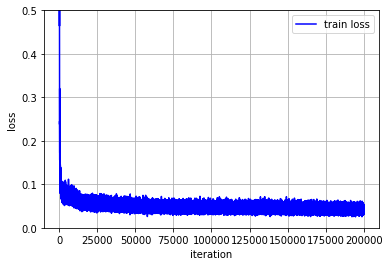

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid()
plt.plot(loss_vec,c='b',linestyle='solid',label='train loss')

#plt.plot(test_loss_vec,c='r',label='test loss')

#plt.xlim(60000,60100)
plt.ylim(0,0.5)
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
plt.savefig(str(hidden_size)+'.png')
plt.legend()


#print(test_loss_vec[99999])
#print(test_loss_vec[99999])

In [11]:
# 重みの保存
saver = tf.train.Saver()
saver.save(sess, './model.ckpt')


'./model.ckpt'

In [12]:
'''
# ボール座標とスティックの傾きプロット
by_max=IN_train.max(axis=0)[1]
by_min=IN_train.min(axis=0)[1]

ball_y = np.array(range(int(by_min)-3,int(by_max)+3))
for i in range(len(ball_y)):
    
    ball = np.array([[6.0, ball_y[i]/10.0]])
    
    print(ball)
    joy = sess.run(final_output, feed_dict={INPUT: ball})
    plt.scatter(ball[0][1],ball[0][0], s=200, c='orange')
    
    plt.quiver(0,0,-joy[0][0],-joy[0][1],angles="xy",scale_units="xy",scale=1)
    #plt.quiver(0,0,-0.6,5,angles="xy",scale_units="xy",scale=1)
    print(joy)
    plt.savefig(str(hidden_size)+'_img'+'.png')
    '''

'\n# ボール座標とスティックの傾きプロット\nby_max=IN_train.max(axis=0)[1]\nby_min=IN_train.min(axis=0)[1]\n\nball_y = np.array(range(int(by_min)-3,int(by_max)+3))\nfor i in range(len(ball_y)):\n    \n    ball = np.array([[6.0, ball_y[i]/10.0]])\n    \n    print(ball)\n    joy = sess.run(final_output, feed_dict={INPUT: ball})\n    plt.scatter(ball[0][1],ball[0][0], s=200, c=\'orange\')\n    \n    plt.quiver(0,0,-joy[0][0],-joy[0][1],angles="xy",scale_units="xy",scale=1)\n    #plt.quiver(0,0,-0.6,5,angles="xy",scale_units="xy",scale=1)\n    print(joy)\n    plt.savefig(str(hidden_size)+\'_img\'+\'.png\')\n    '

In [13]:
# 重みのrestore
predicts_sess = tf.Session(config=config)
ckpt = tf.train.get_checkpoint_state('./')
if ckpt == None:
    print('!!!!!!!WEIGHTS NOT FOUND!!!!!!')

saver.restore(predicts_sess, './model.ckpt')

INFO:tensorflow:Restoring parameters from ./model.ckpt
